# CS412 Machine Learning – Spring 2025 Final Project

**Title:** Sentiment Analysis Using Naive Bayes + TF-IDF  




## 1. Introduction

This project addresses binary sentiment classification using the IMDB movie reviews dataset. In this notebook, we focus on a **Naive Bayes classifier** using **TF-IDF features**. Naive Bayes is a simple and fast probabilistic model often used for text classification.


## 2. Problem Description

This is a **binary classification** problem: determining whether a movie review is **positive** or **negative**. Our classifier predicts the sentiment of a given review based on word frequency patterns.


## 3. Dataset

We use the **IMDB Movie Reviews Dataset**, which includes:  
- 25,000 positive reviews  
- 25,000 negative reviews  

Columns:
- `review`: the movie review text  
- `sentiment`: the corresponding label  


### 4.1 Import Required Libraries

In [ ]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score


### 4.2 Load Dataset

In [ ]:
df = pd.read_csv("/content/IMDB Dataset.csv")
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


### 5. Dataset Statistics

In [ ]:
print("Shape:", df.shape)
print("\nClass Distribution:")
print(df['sentiment'].value_counts())

df['review_length'] = df['review'].apply(lambda x: len(x.split()))
print("\nAverage Review Length (in words):", df['review_length'].mean())


Shape: (50000, 2)

Class Distribution:
sentiment
positive    25000
negative    25000
Name: count, dtype: int64

Average Review Length (in words): 231.15694


## 6. Preprocessing

In [ ]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"<.*?>", " ", text)
    text = re.sub(r"http\S+|www\S+", " ", text)
    text = re.sub(r"[^a-zA-Z\s]", " ", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

df['clean_review'] = df['review'].apply(clean_text)
df['label'] = df['sentiment'].map({'positive': 1, 'negative': 0})

### 6.1 Train/Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    df['clean_review'], df['label'], test_size=0.2, stratify=df['label'], random_state=42
)

## 7. Feature Extraction – TF-IDF

In [ ]:
tfidf = TfidfVectorizer(
    ngram_range=(1, 2),
    max_df=0.8,
    min_df=5,
    max_features=20000,
    stop_words='english'
)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

## 8. Model Training – Naive Bayes

In [ ]:
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

MultinomialNB()

## 9. Evaluation Results

In [ ]:
y_pred = nb_model.predict(X_test_tfidf)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Macro F1 Score:", f1_score(y_test, y_pred, average='macro'))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8701
Macro F1 Score: 0.8700671516766154

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.85      0.87      5000
           1       0.86      0.89      0.87      5000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000


Confusion Matrix:
 [[4271  729]
 [ 570 4430]]


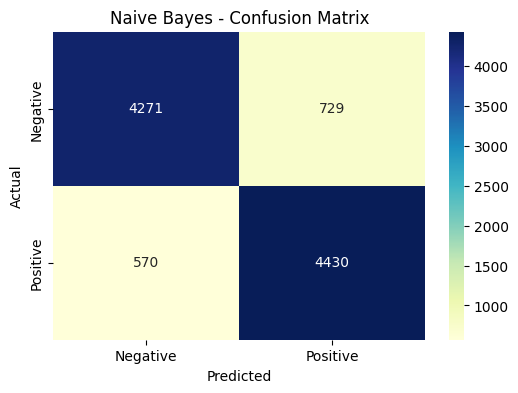

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.title('Naive Bayes - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()